<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Изучение-и-подготовка-данных" data-toc-modified-id="Изучение-и-подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Изучение и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Портрет-пользователя-по-регионам" data-toc-modified-id="Портрет-пользователя-по-регионам-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Портрет пользователя по регионам</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Гипотеза-о-равенстве-средних-пользовательских-рейтингов-платформ" data-toc-modified-id="Гипотеза-о-равенстве-средних-пользовательских-рейтингов-платформ-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Гипотеза о равенстве средних пользовательских рейтингов платформ</a></span></li><li><span><a href="#Гипотеза-о--различии-пользовательский-рейтингов-разных-жанров" data-toc-modified-id="Гипотеза-о--различии-пользовательский-рейтингов-разных-жанров-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Гипотеза о  различии пользовательский рейтингов разных жанров</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Сборный проект №1

## Описание проекта  
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


Согласно документации к проекту, датасет представляет собой данные до 2016 года.
Описание данных:  
* Name — название игры  
* Platform — платформа  
* Year_of_Release — год выпуска  
* Genre — жанр игры  
* NA_sales — продажи в Северной Америке (миллионы проданных копий)  
* EU_sales — продажи в Европе (миллионы проданных копий)  
* JP_sales — продажи в Японии (миллионы проданных копий)  
* Other_sales — продажи в других странах (миллионы проданных копий)  
* Critic_Score — оценка критиков (максимум 100)  
* User_Score — оценка пользователей (максимум 10)  
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

Данные за 2016 год могут быть неполными.

## Изучение и подготовка данных

In [1]:
%pip install seaborn --upgrade

In [2]:
import numpy as np
from scipy import stats as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [3]:
pth1 = 'games.csv'
pth2 = '/datasets/games.csv'
    
if os.path.exists(pth1):
    df = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df = pd.read_csv(pth2)
else:
    print('Something is wrong')

In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Приведем столбцы к нижнему регистру

In [5]:
df.set_axis(df.columns.str.lower(), axis=1, inplace=True)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Изучим общую информацию, количество пропусков, наличие дубликатов, статистику по столбцам и уникальные значения категориальных признаков. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
df.isna().agg(['sum', 'mean']).T

,sum,mean
name,2.0,0.000120
platform,0.0,0.000000
year_of_release,269.0,0.016093
genre,2.0,0.000120
na_sales,0.0,0.000000
eu_sales,0.0,0.000000
jp_sales,0.0,0.000000
other_sales,0.0,0.000000
critic_score,8578.0,0.513192
user_score,6701.0,0.400897


In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [10]:
df.describe(include='object')

,name,platform,genre,user_score,rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


In [11]:
df.platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [12]:
df.genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [13]:
df.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Присвоим для удобства полные названия категориям рейтинга и объединим категории 'K-A' и 'E', т.к. это одна и та же категория 'everyone', которая присваивалась в разные годы.

In [14]:
df = df.replace({'rating':{'E':'everyone', 'M':'mature_17+', 'T':'teen', 'E10+':'everyone_10+', 'AO':'adult_only_18+',
                    'K-A':'everyone', 'EC':'early_childhood', 'RP':'rating_pending'}})

In [15]:
df.rating.unique()

array(['everyone', nan, 'mature_17+', 'teen', 'everyone_10+',
       'adult_only_18+', 'early_childhood', 'rating_pending'],
      dtype=object)

Обработаем обнаруженные пропуски

In [16]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Две записи содержат пропуски по столбцу с названием и с  жанром. Поле с названием является идентификационным признаком, заполнить его на базе имеющихся данных не представляется возможным, поэтому удалим эти строки.

In [17]:
df.dropna(subset = ['name'], inplace=True)

Поле с годом выпуска содержит 269 пропусков. Возможно игры с одинаковым названием выпускаются примерно в одно время, проверим эту гипотезу

In [18]:
def date_range(year):
    return (max(year) - min(year))
(df.groupby('name')['year_of_release'].agg(['count', 'min', 'max', date_range]).
                                        sort_values(by='date_range', ascending=False).head(10))

,count,min,max,date_range
name,,,,
Battlezone,3,1982.0,2016.0,34.0
Romance of the Three Kingdoms II,2,1991.0,2015.0,24.0
Bomberman,4,1985.0,2008.0,23.0
Pro Yakyuu Family Stadium,2,1986.0,2008.0,22.0
Lode Runner,2,1984.0,2006.0,22.0
Final Fantasy III,4,1990.0,2012.0,22.0
Defender,4,1980.0,2002.0,22.0
Mortal Kombat,5,1992.0,2012.0,20.0
Boxing,2,1980.0,2000.0,20.0


Игры с одним и тем же названием могут выпускаться с разницей до 34 лет. Проверим диапазон дат выпускаемых игр для разных платформ.

In [19]:
(df.groupby('platform')['year_of_release'].agg(['count', 'min', 'max', date_range]).
                                        sort_values(by='date_range', ascending=False)).head(10)

,count,min,max,date_range
platform,,,,
PC,957,1985.0,2016.0,31.0
DS,2121,1985.0,2013.0,28.0
GB,97,1988.0,2001.0,13.0
X360,1232,2005.0,2016.0,11.0
PSP,1193,2004.0,2015.0,11.0
PS2,2127,2000.0,2011.0,11.0
NES,98,1983.0,1994.0,11.0
DC,52,1998.0,2008.0,10.0
Wii,1286,2006.0,2016.0,10.0


Большинство платформ живут достаточо долго, чтобы на их базе можно было бы с достаточной точностью определить год выпуска игры. Т.к. год выпуска представляется важным параметром, от принадлежности игры к которому будет зависеть ее включение в выборку для анализа, то удалим пустые строки, тем более их количество составляет всего 1,6% датафрейма.

In [20]:
df.dropna(subset = ['year_of_release'], inplace=True)

In [21]:
df['year_of_release'] = df['year_of_release'].astype(int)

Рассмотрим столбцы с оценками `critic_score` и `user_score`. Столбец `user_score` имеет стоковый тип из-за наличия нечисловых значений 'tbd'. Вероятно, это значения, которые на момент выгрузки данных еще не получены. Независимо от того, что это за значения, в таком виде они не могут представлять интерес для последующего анализа, заменим их на Nan, изменим тип на float и определим корреляцию данного поля c `critic_score`.

In [22]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan
df['user_score'] = df['user_score'].astype(float)

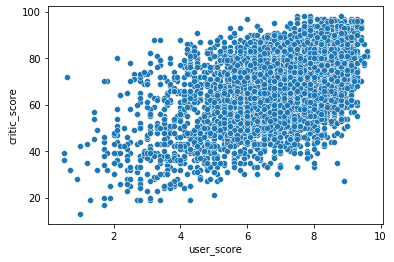

In [23]:
sns.scatterplot(data=df, x='user_score', y='critic_score');

In [24]:
df['user_score'].corr(df['critic_score'])

0.5796706281932217

In [25]:
(df['critic_score'] / df['user_score']).describe()

count    6894.000000
mean       10.107581
std         3.182866
min         3.033708
25%         8.750000
50%         9.746835
75%        10.757576
max       120.000000
dtype: float64

Коэффициент корреляции от 0,5 до 0,75 интерпретируется в основном как значительный (заметный), что позволят оценить значение одного столбца при наличии другого. Используем для этого коэффициент 10,1 исходя из среднего значения отношения оценок критиков и пользователей.

In [26]:
df['user_score'] = df['user_score'].fillna((df['critic_score'] / 10.1).round(1))
df['critic_score'] = df['critic_score'].fillna((df['user_score'] * 10.1).round())

Вероятнее всего игры с одним и тем же названием относятся к одинаковым категориям. Это позволит заполнить пропуски по столбцу `rating`, если имеется одноименная игра с заполненной категорией.

In [27]:
df['rating'].isna().sum()

6676

In [28]:
df.groupby('name')['rating'].agg(['count', 'nunique', 'unique']).sort_values(by='count', ascending=False).head(10)

,count,nunique,unique
name,,,
Need for Speed: Most Wanted,9,2,"[teen, nan, everyone]"
FIFA Soccer 13,8,1,[everyone]
FIFA 14,8,1,"[everyone, nan]"
LEGO Star Wars II: The Original Trilogy,8,2,"[everyone_10+, everyone]"
Madden NFL 07,8,1,[everyone]
Madden NFL 08,8,1,[everyone]
LEGO Marvel Super Heroes,8,1,"[everyone_10+, nan]"
The LEGO Movie Videogame,8,1,[everyone_10+]
LEGO Jurassic World,8,1,[everyone_10+]


В основном игры с одинаковым названием относятся к одной категории, хотя встречаются исключения, но и в этом случае разброс небольшой. Заполним пропуски  `rating` последним по году выпуска заполненным значением категории.

In [29]:
df['rating'].isna().sum()

6676

In [30]:
df = df.sort_values(['name', 'year_of_release'])
df['rating'] = df['rating'].fillna(df.groupby('name')['rating'].transform('last'))

In [31]:
df['rating'].isna().sum()

6259

Некоторые пропуски удалось обработать, однако их количество уменьшилось незначительно

Категория и жанр игры могут быть взаимосвязаны, в этом случае некоторые пропуски по категории могут быть заполнены. Для этого сделаем разбивку игр по категориям и жанрам, определим их количество для каждой группы.

In [32]:
df.pivot_table(index='rating', columns='genre', values='name', aggfunc='count', margins=True)

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,All
rating,,,,,,,,,,,,,
adult_only_18+,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
early_childhood,1.0,2.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
everyone,438.0,164.0,8.0,468.0,373.0,293.0,594.0,88.0,48.0,330.0,1202.0,74.0,4080
everyone_10+,490.0,69.0,19.0,167.0,147.0,42.0,103.0,117.0,56.0,50.0,106.0,77.0,1443
mature_17+,639.0,110.0,55.0,14.0,3.0,NaN,18.0,175.0,559.0,5.0,17.0,26.0,1621
rating_pending,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1
teen,699.0,123.0,371.0,238.0,64.0,10.0,177.0,447.0,347.0,190.0,201.0,162.0,3029
All,2268.0,468.0,453.0,894.0,587.0,345.0,892.0,827.0,1010.0,575.0,1526.0,340.0,10185


In [33]:
# Процентное количество игр различных категории в составе каждого жанра
pivot_genre_rating = ((df.pivot_table(index='rating', columns='genre', values='name', aggfunc='count', margins=True)) / 
    (df.pivot_table(index='rating', columns='genre', values='name', aggfunc='count', margins=True).loc['All'])*100)
pivot_genre_rating.round()

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,All
rating,,,,,,,,,,,,,
adult_only_18+,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
early_childhood,0.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
everyone,19.0,35.0,2.0,52.0,64.0,85.0,67.0,11.0,5.0,57.0,79.0,22.0,40.0
everyone_10+,22.0,15.0,4.0,19.0,25.0,12.0,12.0,14.0,6.0,9.0,7.0,23.0,14.0
mature_17+,28.0,24.0,12.0,2.0,1.0,NaN,2.0,21.0,55.0,1.0,1.0,8.0,16.0
rating_pending,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
teen,31.0,26.0,82.0,27.0,11.0,3.0,20.0,54.0,34.0,33.0,13.0,48.0,30.0
All,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


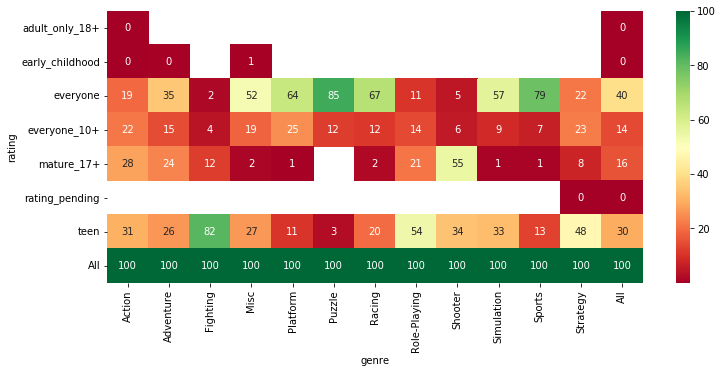

In [34]:
plt.figure(figsize=(12,5))
sns.heatmap(pivot_genre_rating, cmap='RdYlGn', annot=True, fmt='1.0f');

Для некоторых категории связь с жанром прослеживается: жанру 'Fighting' в 82% случаев присваивается категория 'teen', жанру 'Puzzle' в 85% случаев присваивается категория 'everyone', а жанру 'Sports' данная категория присваивается в 79% случаев. Для этих случаев произведем замену пропущенных категории, для остальных жанров (с принадлежностью к категории с максимальным количеством менее 70% значений) оставим пропуски.

In [35]:
df.loc[(df['genre'] =='Fighting') & (df['rating'].isna()), 'rating'] = 'teen'
df.loc[(df['genre'] =='Puzzle') & (df['rating'].isna()), 'rating'] = 'everyone'
df.loc[(df['genre'] =='Sports') & (df['rating'].isna()), 'rating'] = 'everyone'

In [36]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       7892
user_score         7892
rating             4871
dtype: int64

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [37]:
df['total_sales'] = df.na_sales + df.eu_sales + df.jp_sales + df.other_sales

### Выводы
В процессе изучения и подготовки данных заменены названия столбцов, удалены или обработаны некоторые пропуски в столбцах `name`, `genre`, `critic_score`, `user_score`, `rating`, заменены типы данных столбцов, посчитаны суммарные продажи.


## Исследовательский анализ данных

Посмотрим, количество выпускаемых игр и суммарную продажу в разные годы.

Text(0, 0.5, 'total_sales')

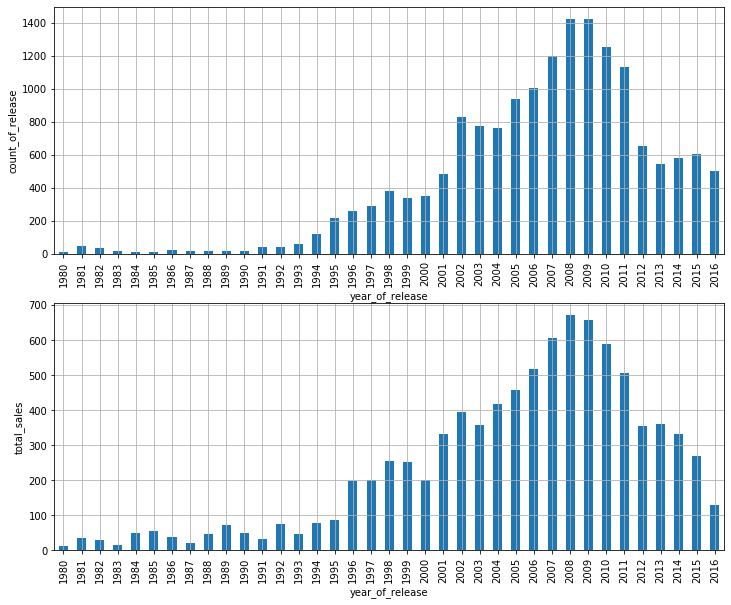

In [38]:
plt.figure(figsize=(12,10))
plt.subplot(2, 1, 1)
df.groupby('year_of_release')['total_sales'].count().plot(kind='bar')
plt.grid()
plt.ylabel('count_of_release')
plt.subplot(2, 1, 2)
df.groupby('year_of_release')['total_sales'].sum().plot(kind='bar')
plt.grid()
plt.ylabel('total_sales')

Количество, продаваемых игр существенно выросло в начале 2000-х годов и достигло пика в 2008-2009 годах, в дальнейшем количество игр снизилось и начиная с 2012 года находится примерно на одинаковом уровне, при этом продажи в основном повторяют динамику по количеству, за исключением 2016 года, когда продажи просели. Скорее всего, причина связана с неполными данными за 2016 год и их лучше исключить из рассмотрения.  Исходя из динамики количества и суммы продаж, период 2012-2015 год может быть использован в качестве базы для прогноза на 2017 год.

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 

In [39]:
df.groupby('platform')['total_sales'].agg(['count', 'sum']).sort_values('sum', ascending=False).head(10)

,count,sum
platform,,
PS2,2127,1233.56
X360,1232,961.24
PS3,1306,931.34
Wii,1286,891.18
DS,2121,802.78
PS,1190,727.58
PS4,392,314.14
GBA,811,312.88
PSP,1193,289.53


In [40]:
platforms = (df.groupby('platform')['total_sales'].agg(['count', 'sum']).
                        sort_values('sum', ascending=False).head(10).index)

Срок жизни платформы PS2 в годах:             11


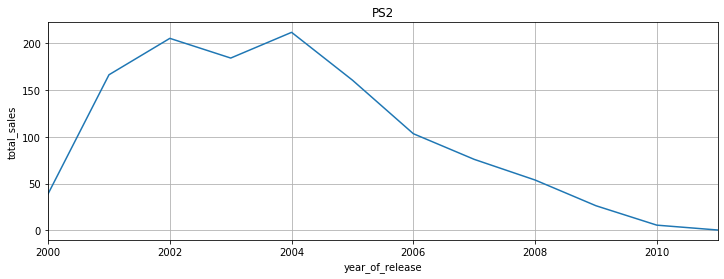

Срок жизни платформы X360 в годах:             11


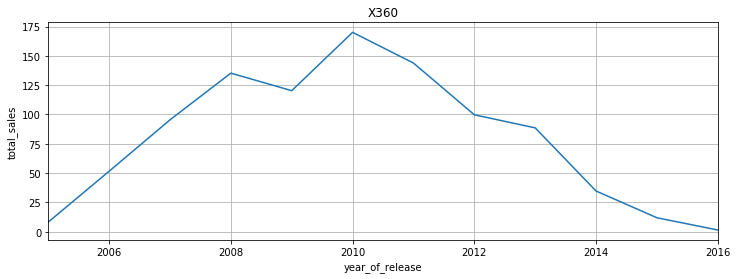

Срок жизни платформы PS3 в годах:             10


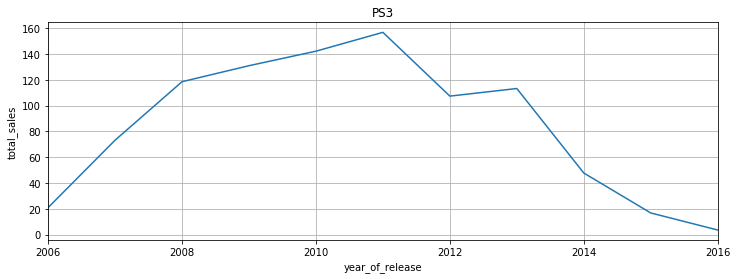

Срок жизни платформы Wii в годах:             10


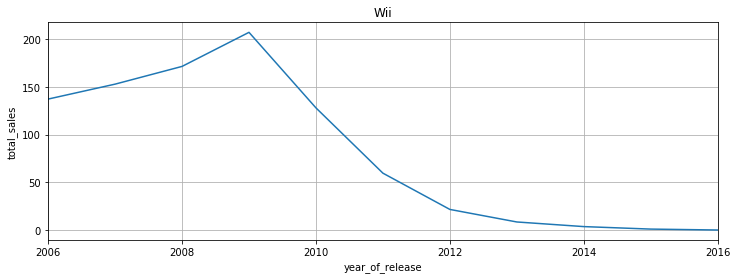

Срок жизни платформы DS в годах:             28


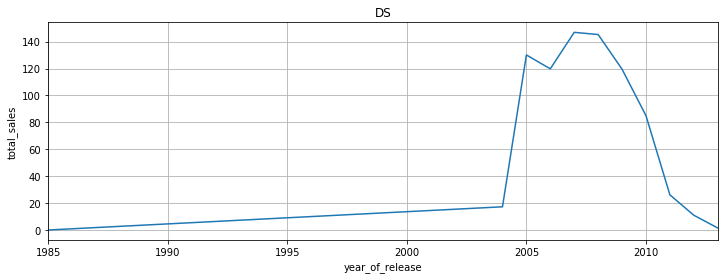

Срок жизни платформы PS в годах:             9


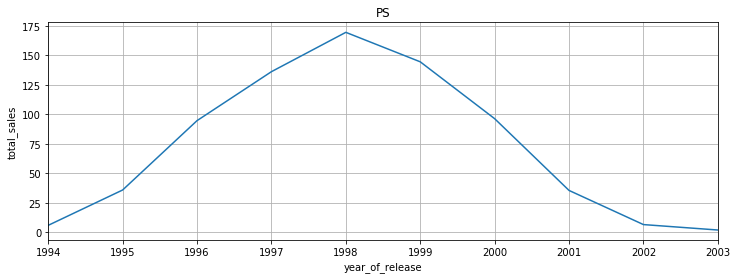

Срок жизни платформы PS4 в годах:             3


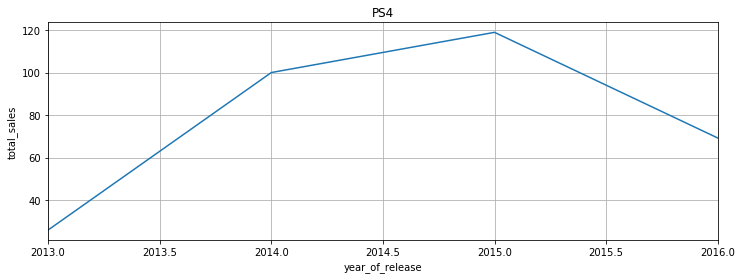

Срок жизни платформы GBA в годах:             7


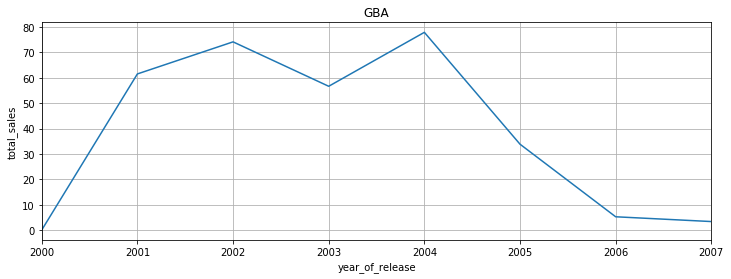

Срок жизни платформы PSP в годах:             11


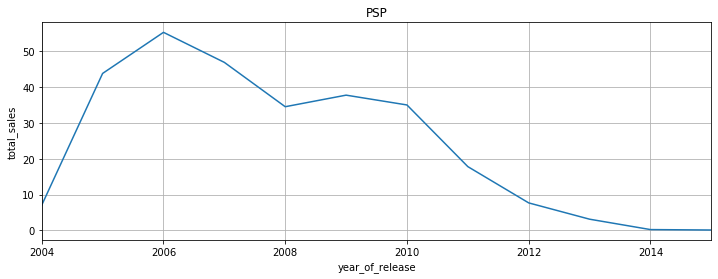

Срок жизни платформы 3DS в годах:             5


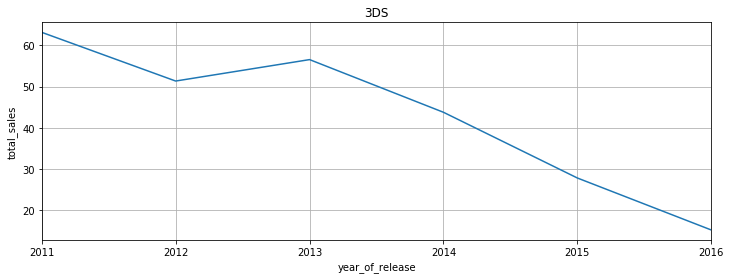

In [41]:
for i in platforms:
    print(f"Срок жизни платформы {i} в годах: \
            {df[df['platform'] == i]['year_of_release'].max() - df[df['platform'] == i]['year_of_release'].min()}")
    plt.figure(figsize=(12,4))
    df[df['platform'] == i].groupby('year_of_release')['total_sales'].sum().plot()
    plt.title(i)
    plt.ylabel('total_sales')
    plt.grid()
    plt.show();

Платформы в основном живут от нескольких до 9-11 лет, при этом периоды максимальных продаж приходятся в основном на периоды длиной 4-5 лет.

Исходя из проведенного анализа, в качестве актуального для прогноза на 2017 год, определим период c 2012 по 2015 гг. Дальнейший анализ будем проводить для этого периода.

In [42]:
df = df.query('2012 <= year_of_release <=2015')

Выберем несколько потенциально прибыльных платформ

''

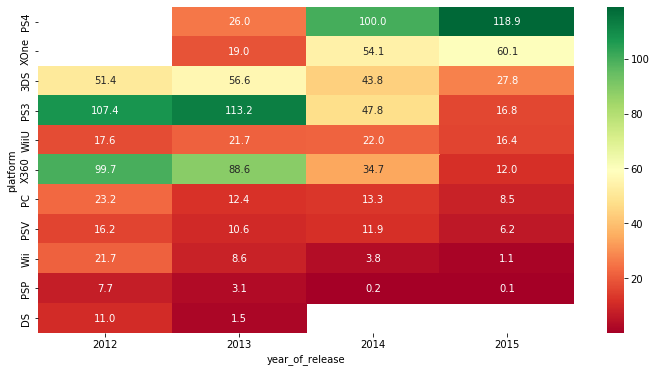

In [43]:
plt.figure(figsize=(12,6))
sns.heatmap(df.pivot_table(index='platform', columns='year_of_release', values='total_sales', 
                aggfunc='sum').sort_values(2015, ascending=False), cmap='RdYlGn', annot=True, fmt='1.1f')
;

Наибольшие продажи, а также растущая динамика прослеживается по двум платформам - PS4 и XOne, причем PS4 в 2 раза обгоняет по продажам Xone. По остальным платформам продажи существенно ниже, к тому же динамика продаж имеет нисходящую динамику.

Рассмотрим распределение глобальных продажам игр в разбивке по платформам. 

In [44]:
df.groupby('platform')['total_sales'].describe().T

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,350.000000,31.000000,196.000000,455.000000,228.000000,173.000000,326.000000,53.000000,133.000000,279.000000,160.000000
mean,0.512771,0.404839,0.292857,0.626791,1.074079,0.064682,0.137822,0.663962,0.583383,0.842366,0.832312
std,1.424582,1.439245,0.546894,1.515258,1.899788,0.071296,0.222652,1.174720,1.105384,1.744755,1.182243
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.050000,0.020000,0.030000,0.050000,0.097500,0.020000,0.030000,0.060000,0.080000,0.100000,0.130000
50%,0.115000,0.050000,0.100000,0.230000,0.310000,0.030000,0.060000,0.180000,0.220000,0.340000,0.350000
75%,0.330000,0.185000,0.292500,0.660000,1.105000,0.090000,0.150000,0.690000,0.530000,0.890000,1.137500
max,14.600000,8.060000,5.140000,21.050000,14.630000,0.360000,1.960000,6.760000,7.090000,16.270000,7.390000


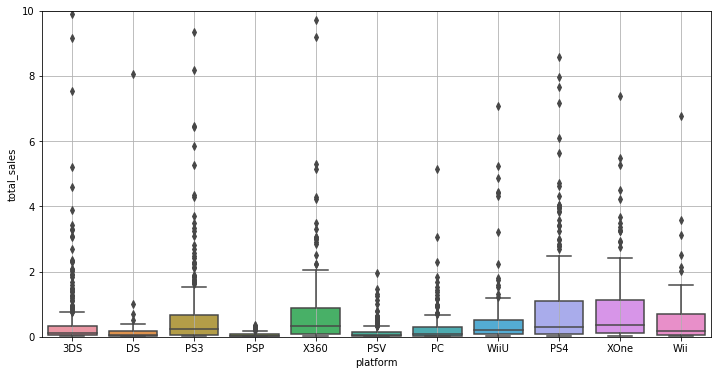

In [45]:
plt.figure(figsize=(12,6))
sns.boxplot(y=df['total_sales'], x=df['platform'])
plt.ylim(0,10)
plt.grid()

Практически по всем платформам распределение игр по суммарным продажам имеет сильную ассиметрию и скос вправо с большим количеством "выбросов", т.е. некоторые игры обеспечивают продажи, существенно превышающую средние значения. Наибольший правый хвост у платформ PS4 и XOne, несколько ниже у X360, PS3 и Wii.

'PS3'

'Коэффициент корреляции общих продаж с оценками пользователей:        -0.0'

'Коэффициент корреляции общих продаж с оценками критиков:        0.2'

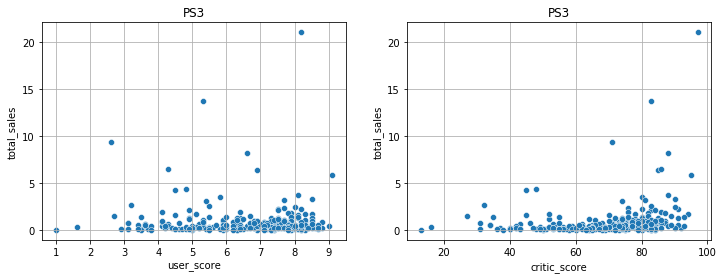

'PS4'

'Коэффициент корреляции общих продаж с оценками пользователей:        0.0'

'Коэффициент корреляции общих продаж с оценками критиков:        0.4'

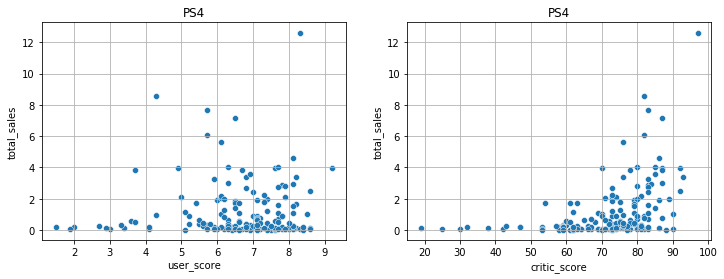

'X360'

'Коэффициент корреляции общих продаж с оценками пользователей:        -0.0'

'Коэффициент корреляции общих продаж с оценками критиков:        0.3'

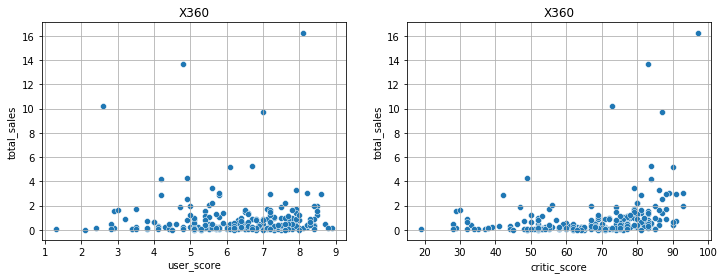

'3DS'

'Коэффициент корреляции общих продаж с оценками пользователей:        0.2'

'Коэффициент корреляции общих продаж с оценками критиков:        0.3'

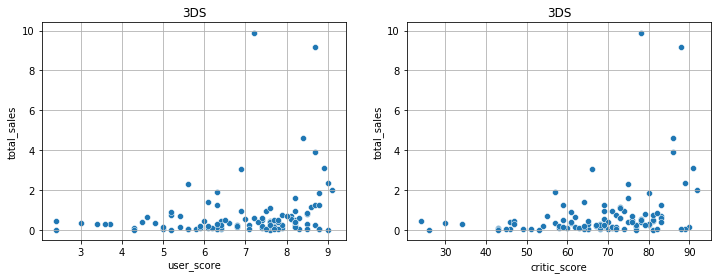

'XOne'

'Коэффициент корреляции общих продаж с оценками пользователей:        -0.0'

'Коэффициент корреляции общих продаж с оценками критиков:        0.5'

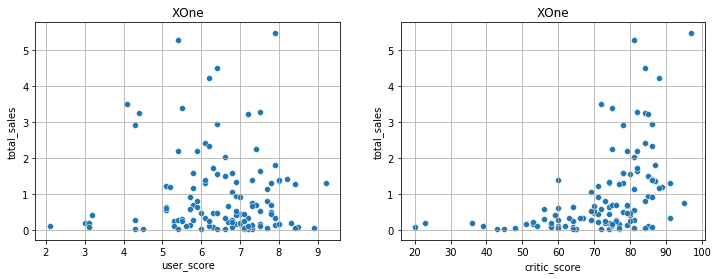

'WiiU'

'Коэффициент корреляции общих продаж с оценками пользователей:        0.4'

'Коэффициент корреляции общих продаж с оценками критиков:        0.4'

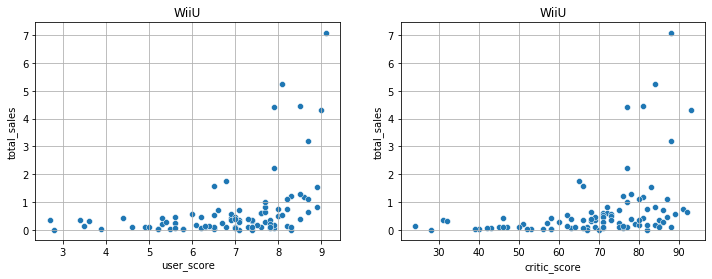

'PC'

'Коэффициент корреляции общих продаж с оценками пользователей:        -0.2'

'Коэффициент корреляции общих продаж с оценками критиков:        0.3'

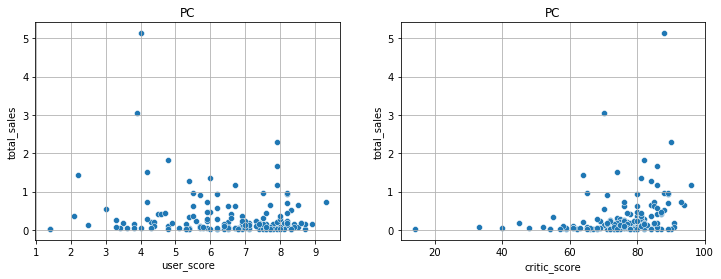

'PSV'

'Коэффициент корреляции общих продаж с оценками пользователей:        0.0'

'Коэффициент корреляции общих продаж с оценками критиков:        0.0'

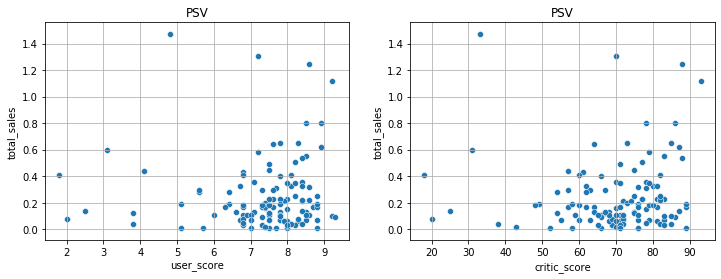

'Wii'

'Коэффициент корреляции общих продаж с оценками пользователей:        0.3'

'Коэффициент корреляции общих продаж с оценками критиков:        0.3'

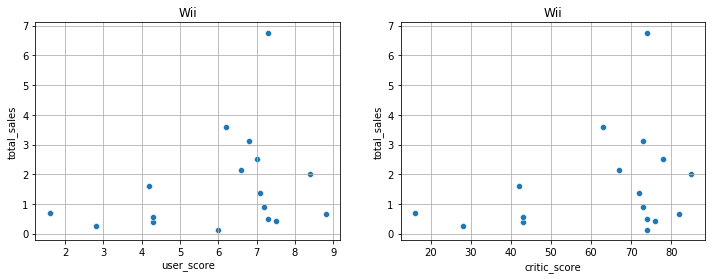

'DS'

'Коэффициент корреляции общих продаж с оценками пользователей:        0.9'

'Коэффициент корреляции общих продаж с оценками критиков:        0.8'

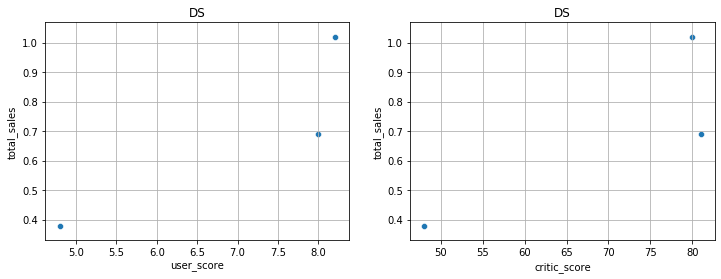

'PSP'

'Коэффициент корреляции общих продаж с оценками пользователей:        -0.8'

'Коэффициент корреляции общих продаж с оценками критиков:        -0.8'

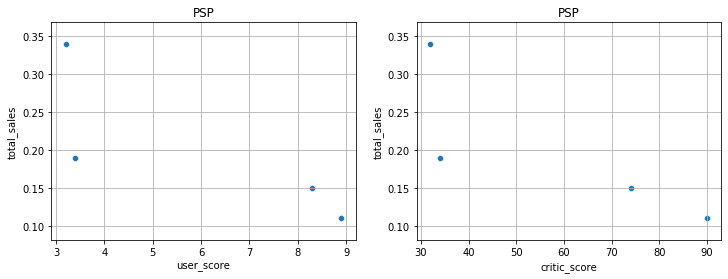

In [46]:
for i in df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).index:
    display(i)
    display(f"Коэффициент корреляции общих продаж с оценками пользователей:\
        {df[df['platform'] == i]['user_score'].corr(df[df['platform'] == i]['total_sales']):.1f}")
    display(f"Коэффициент корреляции общих продаж с оценками критиков:\
        {df[df['platform'] == i]['critic_score'].corr(df[df['platform'] == i]['total_sales']):.1f}")
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.scatterplot(data=df[df['platform'] == i], x = 'user_score', y='total_sales')
    plt.title(i)
    plt.grid()
    plt.subplot(1,2,2)
    sns.scatterplot(data=df[df['platform'] == i], x = 'critic_score', y='total_sales')
    plt.title(i)
    plt.grid()
    plt.show()

Для популярных платформ корреляция общих продаж с оценками пользователей составляет от -0,2 до 0,4, корреляция с оценками критиков выше и устойчиво положительная, хотя тоже слабая - от 0,2 до 0,5.

Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [47]:
df.groupby('genre')['total_sales'].describe().sort_index().T

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
count,853.000000,246.000000,93.000000,160.000000,70.000000,27.000000,91.000000,316.000000,188.000000,62.000000,220.000000,58.000000
mean,0.481841,0.104106,0.430323,0.515250,0.825286,0.180741,0.557253,0.552595,1.417606,0.535968,0.716273,0.210517
std,1.267491,0.220022,0.972603,1.170092,1.473474,0.309515,0.972673,1.362595,2.419928,1.398312,1.125276,0.294478
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.040000,0.020000,0.060000,0.047500,0.092500,0.020000,0.060000,0.060000,0.180000,0.042500,0.090000,0.030000
50%,0.140000,0.030000,0.160000,0.180000,0.285000,0.050000,0.230000,0.150000,0.525000,0.150000,0.305000,0.080000
75%,0.440000,0.080000,0.380000,0.402500,1.020000,0.105000,0.565000,0.512500,1.580000,0.360000,0.785000,0.287500
max,21.050000,1.660000,7.550000,9.180000,9.900000,1.190000,7.090000,14.600000,14.630000,9.170000,8.580000,1.670000


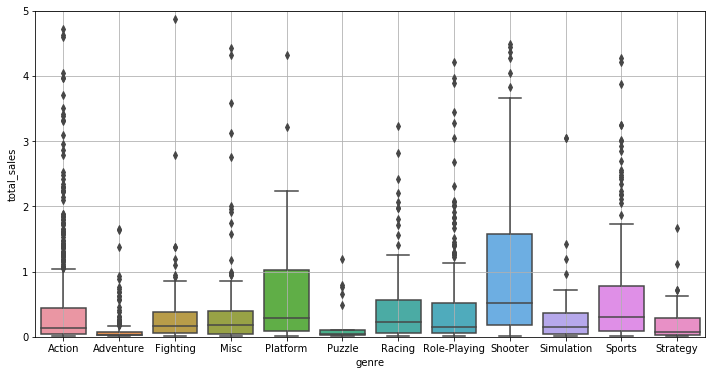

In [48]:
plt.figure(figsize=(12,6))
sns.boxplot(y=df['total_sales'], x=df['genre'].sort_values())
plt.ylim(0,5)
plt.grid()

Средние значения общих продаж игр по большинству жанров составляют от 0,2 до 0,5 млн. копий. На этом фоне выделяется жанр Shooter со средними продажа в районе 1,4 млн. копий и более высоким стандартным отклонением. По жанрам Platform и Sports продажи также несколько выше остальных групп. Наименьшими средними продажами характеризуются жанры Puzzle и Adventure.

### Выводы  
На основе анализа динамики количества игр по годам и характерного срока жизни платформ определен актуальный период для прогнозирования продаж на 2017 год. В качестве актуального периода выбраны годы с 2012 по 2015.  
Исходя из динамики продаж выбраны два потенциально прибыльных платформы - PS4 и XOne.  
Выявлено, что существует слабая положительная корреляция продаж с оценками критиков, с оценками пользователей практически практически отсутствует.  
Наиболее продаваемым жанром является Shooter, продажи выше средних также для жанров Platform и Adventure.


## Портрет пользователя по регионам

Определим для пользователя каждого региона (NA, EU, JP) cамые популярные платформы (топ-5) и самые популярные жанры (топ-5).

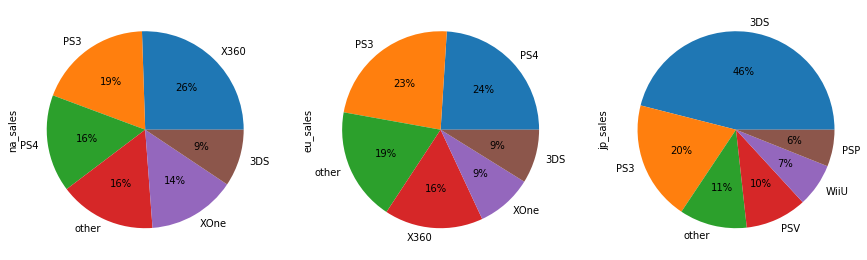

In [49]:
plt.figure(figsize=(15,5))
for i, region in enumerate(['na_sales', 'eu_sales', 'jp_sales']):
    df_temp = df.copy()
    top_platform = df_temp.groupby('platform')[region].sum().sort_values(ascending=False)[:5].index
    df_temp['top_platform'] = df_temp['platform'].apply(lambda x: x if x in top_platform else 'other')
    plt.subplot(1,3,i+1)
    df_temp.groupby(['top_platform'])[region].sum().sort_values(ascending=False).plot(kind='pie', autopct='%.0f%%')


Для каждого региона есть своя лидирующая платформа, показавшая максимальные суммарные продажи за период с 2012 по 2015 гг: для региона Северная Америка наибольшие продажи были по платформе X360 - 26%, остальные топовые платформы занимают от 9 до 19% (PS3, PS4, XOne, 3DS), на долю прочих платформ пришлось 16% продаж. По Европе лидируют платформы PS4 и PS3 (24% и 23% от общих продаж соответственно). В Японии максимально популярна платформа 3DS, на долю которой приходится почти половина продаж (46%).  
Учитывая, что динамика продаж по платформам быстро меняется, интересно посмотреть аналогичные показатели за последний анализируемый год.

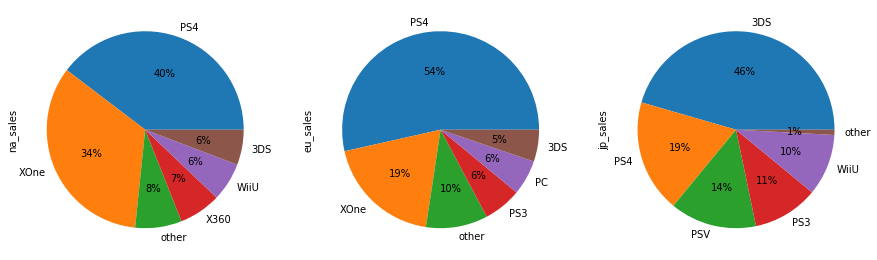

In [50]:
plt.figure(figsize=(15,5))
for i, region in enumerate(['na_sales', 'eu_sales', 'jp_sales']):
    df_temp = df[df['year_of_release'] == 2015].copy()
    top_platform = df_temp.groupby('platform')[region].sum().sort_values(ascending=False)[:5].index
    df_temp['top_platform'] = df_temp['platform'].apply(lambda x: x if x in top_platform else 'other')
    plt.subplot(1,3,i+1)
    df_temp.groupby(['top_platform'])[region].sum().sort_values(ascending=False).plot(kind='pie', autopct='%.0f%%')


За последний год наибольшей популярностью в Северной Америке и Европе обладает платформа PS4. XOne несколько уступает в Северной Америке (на 6%) и существенно отстает от лидера в Европе (почти в 3 раза). В Японии стабильно популярна платформа 3DS (46%), обгоняющая остальные платформы более чем в 2 раза.

Проведем аналогичный анализ по жанрам

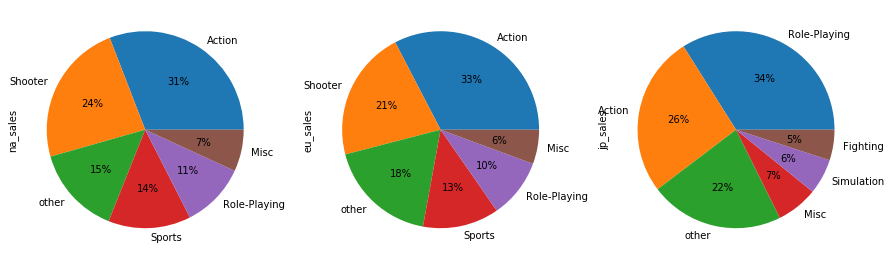

In [51]:
plt.figure(figsize=(15,5))
for i, region in enumerate(['na_sales', 'eu_sales', 'jp_sales']):
    df_temp = df.copy()
    top_genre = df_temp.groupby('genre')[region].sum().sort_values(ascending=False)[:5].index
    df_temp['top_genre'] = df_temp['genre'].apply(lambda x: x if x in top_genre else 'other')
    plt.subplot(1,3,i+1)
    df_temp.groupby(['top_genre'])[region].sum().sort_values(ascending=False).plot(kind='pie', autopct='%.0f%%')

Вкусы пользователей из Северной Америки и Европы практически совпадают - лидирует жанр Action с долей 31% в NA и 33% в EU, на втором месте Shooter(24% и 21% соответственно) и далее по убывающей Sports, Role-Playing и Misc.  У пользователей из Японии лидирует жанр Role-Playing (34%), на втором месте Action (26%). В топ5 c долями 5-7% входят также жанры Misc, Simulation и Fighting. Жанр Shooter, очень популярный в Северной Америке и Европе, не пользуется успехом в Японии

Выявим влияние рейтинга ESRB на продажи в регионах.

In [52]:
# Суммарные продажи по регионам в разбивке категорий ESRB
pivot_reg_rating = df.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], 
                                aggfunc='sum', margins=True)
pivot_reg_rating

,eu_sales,jp_sales,na_sales
rating,,,
everyone,104.77,33.24,111.22
everyone_10+,54.11,8.12,74.03
mature_17+,184.81,20.90,222.85
teen,49.57,31.31,66.85
All,393.26,93.57,474.95


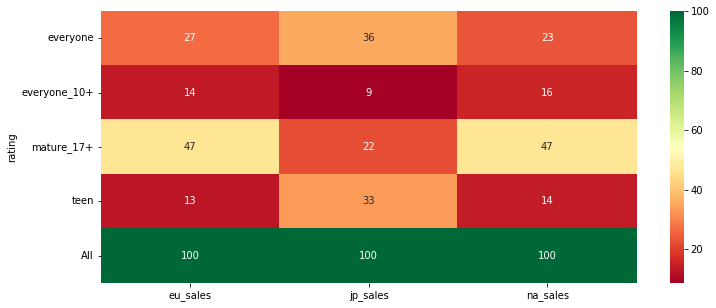

In [53]:
# Процентное количество продажи по регионам в разбивке категорий ESRB
pivot_reg_rating_percent = (pivot_reg_rating) / (pivot_reg_rating.loc['All']) * 100
plt.figure(figsize=(12,5))
sns.heatmap(pivot_reg_rating_percent, cmap='RdYlGn', annot=True, fmt='1.0f');

Для Северной Америки и Европы распределение продаж по категориям ESRB практически совпадает: 47% игр принадлежат категории mature_17+, далее в порядке убывания следуют категории everyone, everyone_10+ и teen. В Японии категории everyone и teen занимают примерно одинаковую долю рынка (36% и 33% соответственно), на долю mature_17+ приходится 22% игр.

### Выводы  
Предпочтения пользователей из Европы и Северной Америки схожи: в основном пользователи из этих регионов выбирают платформы PS4 и Xone, игры в жанре Action и Shooter с рейтиногм от ESRB mature_17+. Предпочтения пользователей из Японии отличаются от европейских и американских: в основном играют на японских приставках 3DS, выбирают для игр жанр Role-Playing и Action с рейтиногм от ESRB everyone и teen.

## Проверка гипотез

### Гипотеза о равенстве средних пользовательских рейтингов платформ

Проверим гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

,count,mean
platform,,
PC,162,6.466667
XOne,118,6.460169


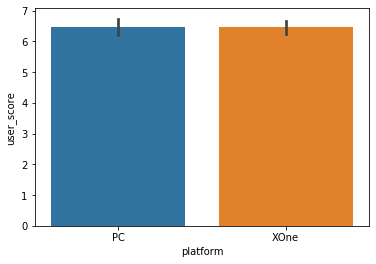

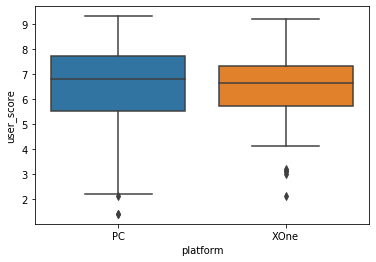

In [54]:
display(df.query("platform in ['XOne', 'PC']").groupby('platform')['user_score'].agg(['count', 'mean']))
sns.barplot(data = df.query("platform in ['XOne', 'PC']"), x='platform', y='user_score')
plt.show()
sns.boxplot(data = df.query("platform in ['XOne', 'PC']"), x='platform', y='user_score')
plt.show()

Средние пользовательские рейтинги платформ XOne и PC  практически не отличаются (отличие около 0,1%). Проверим статистическую значимость такого отклонения

Нулевая гипотеза: средние пользовательские рейтинги платформы XOne и PC равны.  
Альтернативная гипотеза: средние пользовательские рейтинги платформы XOne и PC не равны. 
Гипотеза двухсторонняя, проверяем гипотезу о равенстве средних двух генеральных совокупностей. Размеры выборок различаются не существенно, разброс значений примерно одинаков (параметр equal_var оставим по уолчанию). p-уровень примем соответсвущим достоверному уровню статистической значимости (0,05).

In [55]:
sample_pc = df[df['platform'] == 'PC']['user_score'].dropna()
sample_xone = df[df['platform'] == 'XOne']['user_score'].dropna()
results = st.ttest_ind(sample_pc, sample_xone)

In [56]:
alpha = 0.05
if results.pvalue < alpha:
    print(f'p-value = {results.pvalue}. Отвергаем нулевую гипотезу')
else:
    print(f'p-value = {results.pvalue}.Не получилось отвергнуть нулевую гипотезу')

p-value = 0.9715447196175845.Не получилось отвергнуть нулевую гипотезу


Таким образом, различия в рейтинге пользователей платформ PC и XOne не являются статистически значимыми, даже для уровня значимости, соответствующему минимальной степени статистической значимости

Т.к. мы установили, что наиболее перспективными платформами в текущее время являются PS4 и XOne, интересно проверить гипотезу о равентстве средних пользовательских рейтингов этих платформ. Повторим вышеописанные шаги для PS4 и XOne. Формулировка гипотез аналогична.

,count,mean
platform,,
PS4,157,6.665605
XOne,118,6.460169


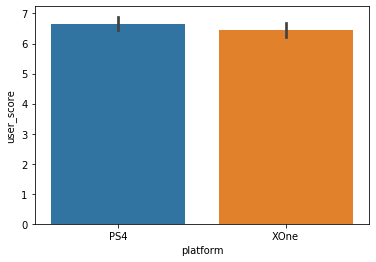

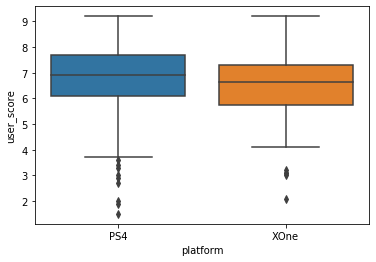

In [57]:
display(df.query("platform in ['XOne', 'PS4']").groupby('platform')['user_score'].agg(['count', 'mean']))
sns.barplot(data = df.query("platform in ['XOne', 'PS4']"), x='platform', y='user_score')
plt.show()
sns.boxplot(data = df.query("platform in ['XOne', 'PS4']"), x='platform', y='user_score')
plt.show()

In [58]:
sample_ps4 = df[df['platform'] == 'PS4']['user_score'].dropna()
sample_xone = df[df['platform'] == 'XOne']['user_score'].dropna()
results = st.ttest_ind(sample_ps4, sample_xone)
alpha = 0.05
if results.pvalue < alpha:
    print(f'p-value = {results.pvalue}. Отвергаем нулевую гипотезу')
else:
    print(f'p-value = {results.pvalue}.Не получилось отвергнуть нулевую гипотезу')

p-value = 0.22299052717978468.Не получилось отвергнуть нулевую гипотезу


Различие в пользовательских рейтингах платформ PS4 и Xone также не являются статистически значимыми.

### Гипотеза о  различии пользовательский рейтингов разных жанров

Проверим гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные.

,count,mean
genre,,
Action,442,6.850905
Sports,160,5.445000


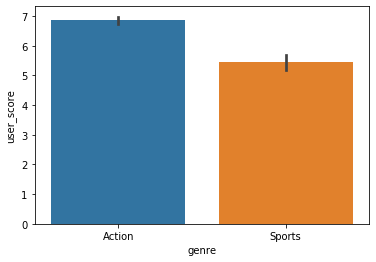

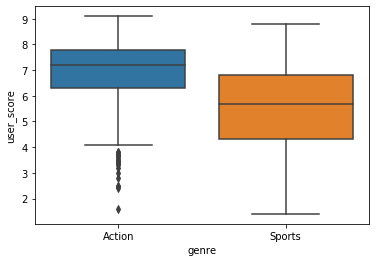

In [59]:
display(df.query("genre in ['Action', 'Sports']").groupby('genre')['user_score'].agg(['count', 'mean']))
sns.barplot(data = df.query("genre in ['Action', 'Sports']"), x='genre', y='user_score')
plt.show()
sns.boxplot(data = df.query("genre in ['Action', 'Sports']"), x='genre', y='user_score')
plt.show()

Средние пользовательские рейтинги жанров Action и Sports  отличаются на 26%. Проверим статистическую значимость такого различия.

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports равны.  
Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports не равны. 
Гипотеза двухсторонняя, проверяем гипотезу о равенстве средних двух генеральных совокупностей. Размеры выборок различаются существенно (зададим параметр equal_var=False). p-уровень примем соответсвущим высокому уровню статистической значимости (0,01).

In [60]:
sample_action = df[df['genre'] == 'Action']['user_score'].dropna()
sample_sports = df[df['genre'] == 'Sports']['user_score'].dropna()
results = st.ttest_ind(sample_action, sample_sports, equal_var=False)

In [61]:
alpha = 0.01
if results.pvalue < alpha:
    print(f'p-value = {results.pvalue}. Отвергаем нулевую гипотезу')
else:
    print(f'p-value = {results.pvalue}.Не получилось отвергнуть нулевую гипотезу')

p-value = 1.1523199103692094e-18. Отвергаем нулевую гипотезу


Значение p-value существенно меньше принятого уровня значимости. Нулевая гипотеза была бы отвергнута даже при установлении p-уровня значимости, равным 0,001, что, как правило, интерпретируется как высший уровень статистической значимости. Таким образом, различия в рейтинге пользователей жанров Action и Sports являются статистически значимыми

## Выводы

В ходе работы над проектом были проанализированы исторические данные об играх, включающие продажи по регионам, оценки пользователей и экспертов, жанры и платформы. Установлен актуальный период 2012-2015 гг, анализ которого позволит сделать качественный прогноз. Основными регионами по продажам являются европейский и северо-американский. Выбраны два потенциально прибыльных платформы - PS4 и XOne. Несмотря на снижающуся динамику продаж по платформе 3DS, она остается самой востребованной в Японии, поэтому ее тоже стоит включить в маркетинговую стратегию, с прицелом на японский рынок. Наиболее популярным жанром является Action, в Северной Америке и Европе очень популярен также жанр Shooter, в Японии Role-Playing. Предпочтения американских и европейских пользователей в основном совпадают, для японских пользователей характерна своя специфика, которую необходимо учитывать при планированнии рекламных активностей. С учетом того, что популярность платформ достаточно быстро меняется, необходимо мониторить состояние рынка с целью своевременного реагирования на изменения пользовательских предпочтений.